In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ks = pd.read_csv("~/Desktop/dataforgood/data/ks-projects-201801.csv")
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [7]:
ks.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [8]:
ks.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [10]:
ks.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [13]:
### Fix code to change N,0's to NO

#for i in country:
#    if ks.country[i] == 'N,0"'
#        ks.country[i] == 'NO'

SyntaxError: invalid syntax (<ipython-input-13-ad5fbc418d1a>, line 2)

## Which regions have the best success with kickstarters?
##### i.e. total number of successes in country / total number of projects in country

In [34]:
states_of_countries = pd.DataFrame(ks.groupby(["country","state"]).state.count())
states_of_countries = states_of_countries.unstack()
states_of_countries

state                                                 
state   canceled    failed    live successful suspended undefined
country                                                          
AT          91.0     378.0    15.0      107.0       6.0       NaN
AU        1065.0    4606.0    70.0     2010.0      88.0       NaN
BE          74.0     371.0    12.0      152.0       8.0       NaN
CA        2138.0    8236.0   132.0     4134.0     116.0       NaN
CH          84.0     465.0    14.0      187.0      11.0       NaN
DE         621.0    2499.0    75.0      937.0      39.0       NaN
DK         157.0     566.0    16.0      360.0      14.0       NaN
ES         331.0    1381.0    52.0      492.0      20.0       NaN
FR         353.0    1612.0    52.0      908.0      14.0       NaN
GB        3761.0   17387.0   279.0    12067.0     178.0       NaN
HK          87.0     261.0    35.0      216.0      19.0       NaN
IE         110.0     476.0    11.0      207.0       7.0       NaN
IT         406.0    1930.0    76.0      439.0      27.0       NaN
JP           8.0      16.0     9.0        7.0       NaN       NaN
LU           4.0      38.0     1.0       19.0       NaN       NaN
MX         221.0    1015.0   107.0      396.0      13.0       NaN
N,0"        22.0     105.0     1.0      105.0       2.0    3562.0
NL         396.0    1794.0    35.0      617.0      26.0       NaN
NO         112.0     420.0     8.0      162.0       6.0       NaN
NZ         151.0     826.0    11.0      448.0      11.0       NaN
SE         209.0    1000.0    20.0      509.0      19.0       NaN
SG          67.0     276.0    28.0      178.0       6.0       NaN
US       28311.0  152061.0  1740.0   109299.0    1216.0       NaN

In [26]:
total_states_per_country = states_of_countries.groupby(['country']).state.sum()
total_states_per_country

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"      3797
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292627
Name: state, dtype: int64

In [33]:
rate_eachstate_country = pd.DataFrame(states_of_countries.state / total_states_per_country)
rate_eachstate_country = rate_eachstate_country.unstack()
rate_eachstate_country

state                                                   
state    canceled    failed      live successful suspended undefined
country                                                             
AT       0.152429  0.633166  0.025126   0.179229  0.010050       NaN
AU       0.135859  0.587575  0.008930   0.256410  0.011226       NaN
BE       0.119935  0.601297  0.019449   0.246353  0.012966       NaN
CA       0.144890  0.558146  0.008946   0.280157  0.007861       NaN
CH       0.110381  0.611038  0.018397   0.245729  0.014455       NaN
DE       0.148885  0.599137  0.017981   0.224646  0.009350       NaN
DK       0.141060  0.508535  0.014376   0.323450  0.012579       NaN
ES       0.145431  0.606766  0.022847   0.216169  0.008787       NaN
FR       0.120109  0.548486  0.017693   0.308949  0.004764       NaN
GB       0.111695  0.516364  0.008286   0.358369  0.005286       NaN
HK       0.140777  0.422330  0.056634   0.349515  0.030744       NaN
IE       0.135635  0.586930  0.013564   0.255240  0.008631       NaN
IT       0.141070  0.670605  0.026407   0.152536  0.009382       NaN
JP       0.200000  0.400000  0.225000   0.175000       NaN       NaN
LU       0.064516  0.612903  0.016129   0.306452       NaN       NaN
MX       0.126142  0.579338  0.061073   0.226027  0.007420       NaN
N,0"     0.005794  0.027653  0.000263   0.027653  0.000527  0.938109
NL       0.138075  0.625523  0.012204   0.215132  0.009066       NaN
NO       0.158192  0.593220  0.011299   0.228814  0.008475       NaN
NZ       0.104354  0.570836  0.007602   0.309606  0.007602       NaN
SE       0.118953  0.569152  0.011383   0.289698  0.010814       NaN
SG       0.120721  0.497297  0.050450   0.320721  0.010811       NaN
US       0.096748  0.519641  0.005946   0.373510  0.004155       NaN

In [38]:
rate_eachstate_country.state.successful.sort_values(ascending=False)
### We find that the US has the best success with Kickstarter with about 37% campaigns succeeding.
### Closely following is the United Kingdom with 35.8% and Hong Kong with 34.95%.

country
US      0.373510
GB      0.358369
HK      0.349515
DK      0.323450
SG      0.320721
NZ      0.309606
FR      0.308949
LU      0.306452
SE      0.289698
CA      0.280157
AU      0.256410
IE      0.255240
BE      0.246353
CH      0.245729
NO      0.228814
MX      0.226027
DE      0.224646
ES      0.216169
NL      0.215132
AT      0.179229
JP      0.175000
IT      0.152536
N,0"    0.027653
Name: successful, dtype: float64

## Mean Pledge Amount per Country
##### use usd_pledged_real

In [49]:
ks.groupby(["country"]).usd_pledged_real.mean().sort_values(ascending=False)
# Interestingly, Switzerland (CH) has the highest average real pledge amount 
# Mexico has the lowest average real pledge amount

country
CH      17155.217096
HK      16228.940032
AT      16190.600603
FR      11690.203409
SG      10536.136523
NL      10197.038870
US       9670.193050
DE       9536.387924
SE       7635.630569
LU       7559.284839
GB       7026.233822
DK       6813.352713
BE       6777.240827
CA       6220.748131
AU       5962.128806
IT       5693.546668
ES       5688.775738
NZ       5405.330124
IE       5163.085709
NO       3769.410565
N,0"     2949.850598
JP       2897.210250
MX       1387.002568
Name: usd_pledged_real, dtype: float64

## Correlation between goal and success/failure
##### use usd_goal_real

In [123]:
ks.groupby(['country','state']).usd_goal_real.mean().unstack()

state,canceled,failed,live,successful,suspended,undefined
country,,,,,,
AT,54568.585824,49083.428757,56955.877333,17563.468785,67428.121667,NaN
AU,78163.159315,76285.384952,20387.479143,7970.463592,39187.237614,NaN
BE,52080.741216,43869.946173,30723.386667,15034.365789,30520.991250,NaN
CA,40578.561389,63490.250461,18271.726818,7612.146251,101274.455259,NaN
CH,65668.541548,421525.553312,52903.897857,21107.786578,21094.869091,NaN
DE,67937.995266,101485.045966,48792.265867,13614.734194,37877.444103,NaN
DK,124281.089045,29230.412138,9687.968125,9187.161944,5936.674286,NaN
ES,54980.288248,69068.376343,17420.810385,9758.237134,19034.030500,NaN
FR,37008.437450,131470.710974,19637.620385,13214.852555,13087.284286,NaN


In [145]:
country_goal_means = ks.groupby(['country']).usd_goal_real.mean().sort_values(ascending=False)
country_goal_means

country
CH      271281.726675
NL      109507.028026
FR       81047.372872
IT       78807.782960
DE       75208.408327
NO       67440.295353
AU       58108.238300
ES       52578.874587
IE       47405.978150
AT       44652.387655
CA       44408.442966
US       44034.969705
GB       42774.124388
SE       40994.175157
BE       37322.199433
DK       35581.350836
LU       33783.152097
NZ       25572.492958
HK       23865.608835
JP       16596.918250
SG       15474.692721
MX       14869.932825
N,0"      5097.306455
Name: usd_goal_real, dtype: float64

In [146]:
### trying to get the mean of usd_goal_real, for failed states, for each country 
failures = ks[ks['state'] == 'failed'].groupby('country')['usd_goal_real'].mean()
failures 

country
AT       49083.428757
AU       76285.384952
BE       43869.946173
CA       63490.250461
CH      421525.553312
DE      101485.045966
DK       29230.412138
ES       69068.376343
FR      131470.710974
GB       60895.593468
HK       33562.054291
IE       58449.820819
IT       99104.481746
JP       16601.266250
LU       43371.481316
MX       18443.720414
N,0"     35458.673333
NL       89953.460708
NO       58735.074214
NZ       33202.509189
SE       54043.301830
SG       18408.315725
US       60664.242108
Name: usd_goal_real, dtype: float64

In [147]:
success = ks[ks['state'] == 'successful'].groupby('country')['usd_goal_real'].mean()
success 

country
AT      17563.468785
AU       7970.463592
BE      15034.365789
CA       7612.146251
CH      21107.786578
DE      13614.734194
DK       9187.161944
ES       9758.237134
FR      13214.852555
GB       8171.653679
HK      12890.763194
IE      10860.509275
IT      10029.062620
JP       4481.211429
LU      14965.576316
MX       3584.164470
N,0"     5901.758857
NL      12824.328428
NO       6747.101667
NZ       7234.105000
SE       8779.036189
SG       9426.487753
US       9695.670955
Name: usd_goal_real, dtype: float64

In [148]:
np.corrcoef(country_goal_means, failures)
# little to no correlation between the average goals per country and failures

array([[1.        , 0.09886957],
       [0.09886957, 1.        ]])

In [151]:
correlation = np.corrcoef(country_goal_means, success)
correlation
# As we can see, there is some correlation between average goals per country and its success.
### Possibly looking into regression to see if this is significant

array([[1.        , 0.45324422],
       [0.45324422, 1.        ]])

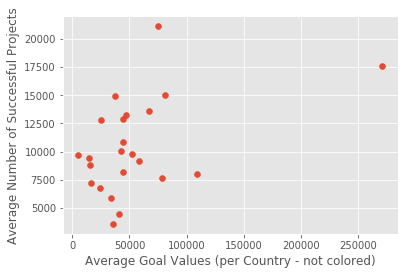

In [156]:
#try to color dots by country??
matplotlib.style.use('ggplot')

plt.scatter(country_goal_means, success)
plt.xlabel('Average Goal Values (per Country - not colored)')
plt.ylabel('Average Number of Successful Projects')
plt.show()

In [140]:
#trying to do a linear regression?

NameError: name 'train_test_split' is not defined

## Currency vs. region
##### use usd_pledged_real, usd_goal_real VALUES

In [158]:
ks.groupby(["country"])["usd_pledged_real", "usd_goal_real"].count()

,usd_pledged_real,usd_goal_real
country,,
AT,597,597
AU,7839,7839
BE,617,617
CA,14756,14756
CH,761,761
DE,4171,4171
DK,1113,1113
ES,2276,2276
FR,2939,2939


In [165]:
ks.groupby(["country"])["usd_goal_real","usd_pledged_real"].mean()

,usd_goal_real,usd_pledged_real
country,,
AT,44652.387655,16190.600603
AU,58108.238300,5962.128806
BE,37322.199433,6777.240827
CA,44408.442966,6220.748131
CH,271281.726675,17155.217096
DE,75208.408327,9536.387924
DK,35581.350836,6813.352713
ES,52578.874587,5688.775738
FR,81047.372872,11690.203409


In [160]:
ks.groupby(["country"])["usd_pledged_real"].mean().sort_values(ascending=False)

country
CH      17155.217096
HK      16228.940032
AT      16190.600603
FR      11690.203409
SG      10536.136523
NL      10197.038870
US       9670.193050
DE       9536.387924
SE       7635.630569
LU       7559.284839
GB       7026.233822
DK       6813.352713
BE       6777.240827
CA       6220.748131
AU       5962.128806
IT       5693.546668
ES       5688.775738
NZ       5405.330124
IE       5163.085709
NO       3769.410565
N,0"     2949.850598
JP       2897.210250
MX       1387.002568
Name: usd_pledged_real, dtype: float64

In [161]:
ks.groupby(["country"])["usd_goal_real"].mean().sort_values(ascending=False)

country
CH      271281.726675
NL      109507.028026
FR       81047.372872
IT       78807.782960
DE       75208.408327
NO       67440.295353
AU       58108.238300
ES       52578.874587
IE       47405.978150
AT       44652.387655
CA       44408.442966
US       44034.969705
GB       42774.124388
SE       40994.175157
BE       37322.199433
DK       35581.350836
LU       33783.152097
NZ       25572.492958
HK       23865.608835
JP       16596.918250
SG       15474.692721
MX       14869.932825
N,0"      5097.306455
Name: usd_goal_real, dtype: float64